- whole dataset import
- data exploration
- data cleaning
- creation of new datasets for the 8 most frequent languages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

import nltk
import spacy
import re
import pickle


# Importing the dataset and data exploring

In [3]:
df_tot = pd.read_csv('/content/drive/MyDrive/Progetto_TA_2022/df_tot.csv')


In [4]:
df_tot.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


In [5]:
df_tot.shape

(290183, 5)

In [6]:
df_tot['Genre'].value_counts() #Genre distribution in training set

Rock          121404
Pop           108714
Metal          20291
Jazz           13545
Folk            8644
Indie           8449
R&B             2793
Hip-Hop         2240
Electronic      2213
Country         1890
Name: Genre, dtype: int64

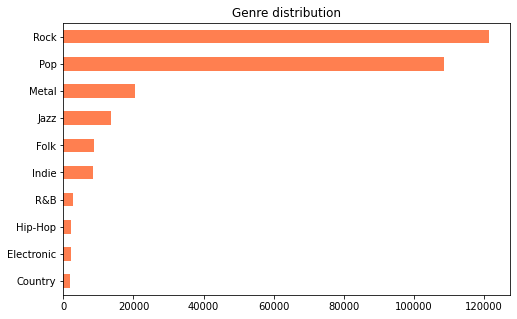

In [7]:
plt.rcParams['figure.figsize'] = [8,5]
x = df_tot['Genre'].value_counts().sort_values(ascending = True)
plt.title("Genre distribution")
x.plot(kind ='barh', color="coral")

In [8]:
lang = df_tot["Language"].unique()
lang

array(['en', 'ro', 'pt', 'ca', 'es', 'cy', 'so', 'it', 'tl', 'sv', 'fr',
       'af', 'sw', 'nl', 'sq', 'vi', 'no', 'da', 'de', 'id', 'hr', 'fi',
       'pl', 'et', 'sl', 'sk', 'hu', 'tr', 'lt', 'cs', 'ko', 'ru', nan,
       'lv'], dtype=object)

In [9]:
df_tot["Language"].value_counts() #Language distribution in training set

en    250197
pt     30102
es      3892
ro      1184
it       808
id       737
fr       644
de       478
sw       304
tl       241
so       229
cy       226
ca       137
tr       116
nl       116
sk        98
hr        97
no        93
sl        77
af        77
da        71
sv        61
et        58
fi        54
pl        24
cs        17
sq        15
hu        10
vi         7
ru         4
lt         2
lv         2
ko         1
Name: Language, dtype: int64

# Data cleaning

In [10]:
df_tot['Language'].isnull().values.any() #checking if there are any NaN values

True

In [11]:
df_tot['Genre'].isnull().values.any()

False

In [12]:
df_tot['Lyrics'].isnull().values.any()

True

In [13]:
df_tot.dropna(subset = ['Language'], inplace=True) #eliminating the rows with NaN values in Language and Lyrics 


In [14]:
df_tot.dropna(subset = ['Lyrics'], inplace=True)

In [20]:
df_tot['Lyrics']= df_tot['Lyrics'].replace('[\!\\@#©$%^&~*()¡{};:\",\./<>?\'|`\-\]\[]', ' ', regex =True) #substituting special characters with single spaces
df_tot['Lyrics']= df_tot['Lyrics'].replace('\d+', ' ', regex =True) #substituting numbers with single spaces
df_tot['Lyrics'] = df_tot['Lyrics'].str.lower() #lowercasing
df_tot['Lyrics'] = df_tot['Lyrics'].replace('\n', ' ', regex =True) #eliminating '\n' in text
df_tot['Lyrics']= df_tot['Lyrics'].replace(' +', ' ', regex=True) #substituting double spaces with single spaces

In [21]:
df_tot = df_tot.reset_index()
df_tot = df_tot.drop(['index'], axis = 1)

In [22]:
df_tot.shape #checking how many rows are left

(290144, 5)

#Creating 8 new datasets 

The 8 most frequent languages are: english, portuguese, spanish, romanian, italian, indonesian, french and german. Here I'm creating a single dataset for each of these languages, filtering the original dataset. 

In [25]:
df_en = df_tot[df_tot['Language'] == 'en']
df_pt = df_tot[df_tot['Language'] == 'pt']
df_es = df_tot[df_tot['Language'] == 'es']
df_ro = df_tot[df_tot['Language'] == 'ro']
df_it = df_tot[df_tot['Language'] == 'it']
df_id = df_tot[df_tot['Language'] == 'id']
df_fr = df_tot[df_tot['Language'] == 'fr']
df_de = df_tot[df_tot['Language'] == 'de']

I save the datasets in distinct pickle files

In [26]:
with open('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_en.pkl','wb') as outfile:
    pickle.dump(df_en,outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_pt.pkl','wb') as outfile:
    pickle.dump(df_pt,outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_es.pkl','wb') as outfile:
    pickle.dump(df_es,outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_ro.pkl','wb') as outfile:
    pickle.dump(df_ro,outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_it.pkl','wb') as outfile:
    pickle.dump(df_it,outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_id.pkl','wb') as outfile:
    pickle.dump(df_id,outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_fr.pkl','wb') as outfile:
    pickle.dump(df_fr,outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_de.pkl','wb') as outfile:
    pickle.dump(df_de,outfile)